# Exploring a new dataset
- For each new dataset you encounter, you'll need to understand what state it is in
- Exploration and cleaning will have to occur with all datasets
- The purpose of this notebook is to function as an exploration checklist

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read in dataset
- Here I've read it in from a library
- Normally you'd use `read_csv` like below or `read_sql`
- In this dataset, target refers to plant type which have been assigned a number between 0-2

`df = pd.read_csv('data.csv)`

In [3]:
from sklearn import datasets

iris_dataset = datasets.load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
df['target'] = iris_dataset['target']

## Examine the data
- Need to ensure the datatypes are correct for each column
    - Numeric
    - String
    - Dates
- Presence of unexpected datatypes may indicate the presence of errors

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Convert datatypes
- sepal length was already a float but I'm converting it as an example
- `errors='coerce'` will replace non-numeric data with nan (not a number)

In [8]:
df['sepal length (cm)'] = pd.to_numeric(df['sepal length (cm)'], errors='coerce')
df['target'] = df['target'].astype('category')

## Examine categorical variables

In [9]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

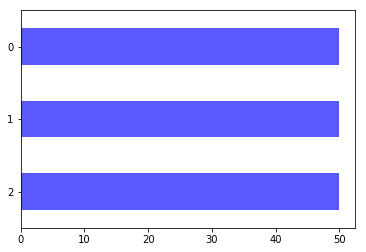

In [10]:
df['target'].value_counts().plot(kind='barh', color="blue", alpha=.65)

## Visualise relationships
- Look at the distribution of the data
- Look for outliers or minority classes

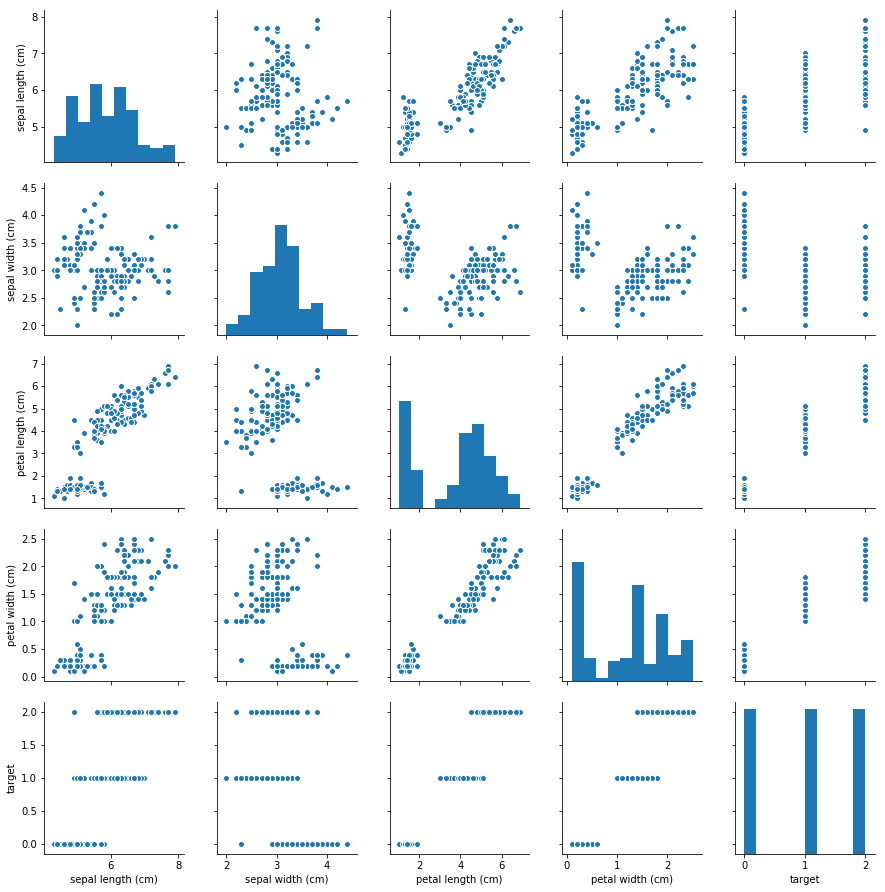

In [11]:
sns.pairplot(data=df) # hue='target'

## Missing values
### Finding them
- Check for missing values: they are indicated by a `nan`
- Be careful, some datasets may not leave a blank space for us to infer missing values
- Instead, you may have to look for signs of them, such as them being recorded as:
    - 0s
    - Spaces
- You can either replace them or remove them
- Consider whether missing values are random or if there is a systemic bias in the dataset
- Removing data with missing values may result in you throwing too much information away

In [12]:
# examine every column
pd.notnull(df).all()

sepal length (cm)    True
sepal width (cm)     True
petal length (cm)    True
petal width (cm)     True
target               True
dtype: bool

In [13]:
# Examine rows with missing values
df[df['target'].isnull()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


### Replacing missing values
- Simplest methods involve replacing missing values with:
    - 0s
    - mean/mean
    - min
- You can also try to use more advanced techinques to try and infer the missing values
- Be careful, this can have a big impact on your results

In [17]:
df.fillna(0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Dropping missing values
- Can be done at the column or row level
    - Column: axis=1
    - row: axis=0
- You can choose how strict you want to be when filtering out missing values

In [15]:
# Columns: delete if all or any of the values in them are missing
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=1, how='any')

# Rows: Delete if any are missing or if there are less than 2 non-missing balues
df = df.dropna(axis=0, how='any')
df.dropna(thresh=2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Viewing duplicate rows

In [16]:
# you can select specific columns to check
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
9,4.9,3.1,1.5,0.1,0
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


### Eliminating duplicate rows

In [30]:
df = df.drop_duplicates()

## Visualise relationships and categorical variables

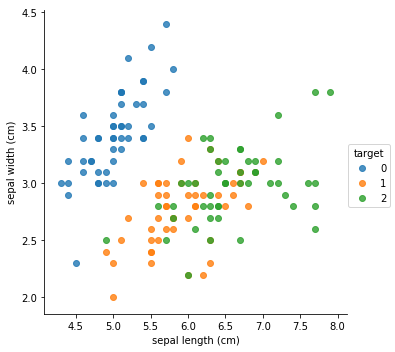

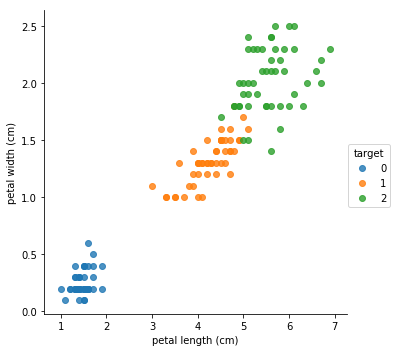

In [35]:
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=df, fit_reg=False)
sns.lmplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=df, fit_reg=False)

## Check Business Logic
- Numeric
    - Should some values be positive, negative, larger/smaller?
    - Should some numbers in one column be larger/smaller than those in another?
- Strings
    - Could there be spelling mistakes?
    - Multiple ways of referring to the same thing?
- Dates
    - Earliest/latest possible date
    - Should dates in some columns always occur earlier/later than those in another?